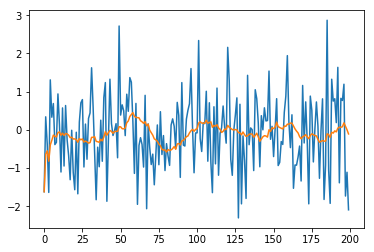

In [17]:
# Question 1


%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

L=200
random_number = [np.random.randn() for i in range(L)] 
lenght = 20
x = []

for i in range(len(random_number)):
    
    s = 0
    n = 0
    
    for j in range(lenght):
        
        if i-j < 0:
            
            break;
        
        s = s + random_number[i-j]
        n = n + 1
    x.append(s/n)

plt.plot(random_number)
plt.plot(x)
plt.show()

In [8]:
#Question 2
#a European Options Pricing
import numpy as np

def EuropeanBinomialCall(S,K,T,r,sigma,n=100):
    deltaT = T/n
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1.0 / u
    a = np.exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i+1)] for i in range(n+1)]
    for j in range (n+1):#filling the last nodes of the tree
        v[n][j]=max(S*u**j*d**(n-j)-K,0.0)
    for i in range(n-1, -1, -1):#going backwards
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) #filling the nodes
    return v[0][0]
def EuropeanBinomialPut(S,K,T,r,sigma,n=100):
    deltaT = T/n
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1.0 / u
    a = np.exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i+1)] for i in range(n+1)]
    for j in range (n+1):#filling the last nodes of the tree
        v[n][j]=max(-S*u**j*d**(n-j)+K,0.0)
    for i in range(n-1, -1, -1):#going backwards
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) #filling the nodes
    return v[0][0]
print (EuropeanBinomialCall(100,120,5,0.1,0.05))
print (EuropeanBinomialPut(100,120,5,0.1,0.05))


27.2191964254
0.00287559087844


In [20]:
#Question 2
#b American Options Pricing

#American Option Pricing
def AmericanBinomialCall(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a =np.exp(r*deltaT)
    p=(a - d) / (u - d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(S* u**j * d**(n-j)-K,0.0)
    for i in range(n-1,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max((S* u**j * d**(i-j))-K,0) 
            v[i][j]=max(v1,v2)
    return v[0][0]

def AmericanBinomialPut(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a =np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(-S* u**j * d**(n-j)+K,0.0)
    for i in range(n-1,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max(-(S* u**j * d**(i-j))+K,0) 
            v[i][j]=max(v1,v2)
    return v[0][0]
print (AmericanBinomialCall(100,120,5,0.1,0.05))
print (AmericanBinomialPut(100,120,5,0.1,0.05))

27.2191964254
20.0


In [ ]:
import pandas as pd

import numpy as np
import datetime

msft = pd.read_csv("msft.csv", index_col=0, parse_dates=True)
aapl = pd.read_csv("aapl.csv", index_col=0, parse_dates=True)


In [43]:

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.expand_frame_repr', False)

import datetime

msft = pd.read_csv("msft.csv", index_col=0, parse_dates=True)
aapl = pd.read_csv("aapl.csv", index_col=0, parse_dates=True)
## Parameters
capital = 1000
p= 0.5
r = 0.1

## Prepare returns

# combine MSFT and AAPL data in the same dataframe
combined_df = pd.merge(left=msft[["Open", "Adj Close"]], right=aapl[["Open","Adj Close"]],
                       left_index=True, right_index=True,
                       suffixes=['msft', 'aapl'])

# Calculate AAPL and MSFT daily returns on Adj Close
combined_df["Daily Return msft"] = combined_df["Adj Closemsft"].diff(1)
combined_df["Daily Return aapl"] = combined_df["Adj Closeaapl"].diff(1)

# Calculate AAPL and MSFT biweekly returns on Adj Close
combined_df["10day Return msft"] = combined_df["Adj Closemsft"].diff(10)
combined_df["10day Return aapl"] = combined_df["Adj Closeaapl"].diff(10)

# Holdings of numberf of shares for the STATIC strategy ( to be filled in during backtest)
combined_df["Static Holdingsmsft"]= np.NaN
combined_df["Static Holdingsaapl"]= np.NaN

# Holdings of numberf of shares for the DYNAMIC strategy ( to be filled in during backtest)
combined_df["Dynamic Holdingsmsft"]= np.NaN
combined_df["Dynamic Holdingsaapl"]= np.NaN

## Back-test looping through trading days
for i in range(1, len(combined_df)):
    index = combined_df.iloc[i].name
    print(index.weekday())
    if i==1: # initial investment - assume we can hold float number of shares
        combined_df["Static Holdingsmsft"][i] = capital * p / combined_df.iloc[i-1]["Adj Closemsft"]
        combined_df["Static Holdingsaapl"][i] = capital * (1-p) / combined_df.iloc[i - 1]["Adj Closeaapl"]
    else:

        if index.weekday() == 0 and i > 10: # check for rebalance every monday
            msft_up = True if combined_df.iloc[i]["10day Return msft"] > 0 else False
            aapl_up = True if combined_df.iloc[i]["10day Return aapl"] > 0 else False

            # investment logic
            if msft_up and ~aapl_up:
                do = " sell %f percent aapl on %s, then buy msft "%(r, str(index))

            elif ~msft_up and aapl_up:
                do = " sell %f percent msft on %s, then buy aapl "%(r, str(index))

            else: # do nothing
                pass
        else: # if not rebalance day, skip
            pass

## Plot where the dates are x axis, and the returns are the y axis
plt.plot(combined_df.index.tolist(), combined_df['Static Strategy Returrns'])
plt.show()

plt.plot(combined_df.index.tolist(), combined_df['Dynamic Strategy Returrns'])
plt.show()



2
3
4
0
1
2
3
4
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
1
2
3
4
0
2
3
4


KeyError: 'Static Strategy Returrns'